## Datu ielasīšana, priekšapstrāde un sākotnējā atspoguļošana


In [2]:
# Visu datu ielasīšanai, priekšapstrādei un vizualizācijai nepieciešamo bibliotēku pievienošana
#Nepieciešamo bibliotēku pievienošana
import csv

import numpy as np  # type: ignore
import pandas as pd  # type: ignore
import matplotlib  # type: ignore
import matplotlib.pyplot as plt  # type: ignore
import seaborn as sns  # type: ignore
import scipy.stats as stats  # type: ignore

In [3]:
import os

# Tiek nolasīts datu kopas fails
datu_kopa = pd.read_csv("fgl.csv")
# Tiek atspoguļoti datu kopas kolonu datu tipi
print(datu_kopa.dtypes)

rownames      int64
RI          float64
Na          float64
Mg          float64
Al          float64
Si          float64
K           float64
Ca          float64
Ba          float64
Fe          float64
type         object
dtype: object


### Datu tipu salāgošana


In [4]:
# Tā kā kategoriskiem atribūtiem tiek norādīts tips "object", tas tiek mainīts uz "category"
datu_kopa["type"] = datu_kopa["type"].astype("category")

print(datu_kopa.dtypes)
# dropping the first column of the csv file because it is just the index
datu_kopa = datu_kopa.drop(datu_kopa.columns[0], axis=1)

print(datu_kopa.head(7))

datu_kopa["type_code"] = datu_kopa["type"].cat.codes
print(datu_kopa.head(7))

rownames       int64
RI           float64
Na           float64
Mg           float64
Al           float64
Si           float64
K            float64
Ca           float64
Ba           float64
Fe           float64
type        category
dtype: object
     RI     Na    Mg    Al     Si     K    Ca   Ba    Fe  type
0  3.01  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.00  WinF
1 -0.39  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00  WinF
2 -1.82  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00  WinF
3 -0.34  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00  WinF
4 -0.58  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00  WinF
5 -2.04  12.79  3.61  1.62  72.97  0.64  8.07  0.0  0.26  WinF
6 -0.57  13.30  3.60  1.14  73.09  0.58  8.17  0.0  0.00  WinF
     RI     Na    Mg    Al     Si     K    Ca   Ba    Fe  type  type_code
0  3.01  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.00  WinF          4
1 -0.39  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00  WinF          4
2 -1.82  13.53  3.55  1.54  7

### Informācijas par datu kopu izvade un analīze


In [5]:
# Tālākajam darbam tiek atmesti kategorijas tipa atribūti
samazinata_datu_kopa = datu_kopa[
    ["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "type_code"]
]
# Tiek izvadīti dati par datu kopu
print(samazinata_datu_kopa.describe())
print(samazinata_datu_kopa.info())

               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     0.365421   13.407850    2.684533    1.444907   72.650935    0.497056   
std      3.036864    0.816604    1.442408    0.499270    0.774546    0.652192   
min     -6.850000   10.730000    0.000000    0.290000   69.810000    0.000000   
25%     -1.477500   12.907500    2.115000    1.190000   72.280000    0.122500   
50%     -0.320000   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.157500   13.825000    3.600000    1.630000   73.087500    0.610000   
max     15.930000   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe   type_code  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    3.542056  
std      1.423153    0.497219    0.097439    1.611463  
min      5.430000    0.000000    0.000000    0

### Datu normalizācija


In [6]:
# Visiem atribūtiem tiek veikta datu normalizācija, lai dati būtu uzskatāmaki
darba_datu_kopa = samazinata_datu_kopa.copy()
# Normalizācija ar negatīvās vērtības kompensešanu
# Kompenesšana ar minimālo vērtību
# tmp=darba_datu_kopa['RI'].min()
darba_datu_kopa["RI"] = darba_datu_kopa["RI"] - darba_datu_kopa["RI"].min()
# Normalizācija
# print(darba_datu_kopa['RI'].max()+tmp)
# print(darba_datu_kopa['RI'].min())
darba_datu_kopa["RI"] = (darba_datu_kopa["RI"] - darba_datu_kopa["RI"].min()) / (
    darba_datu_kopa["RI"].max() - darba_datu_kopa["RI"].min()
)
# Vienkarsa normalizacija
darba_datu_kopa["Na"] = (darba_datu_kopa["Na"] - darba_datu_kopa["Na"].min()) / (
    darba_datu_kopa["Na"].max() - darba_datu_kopa["Na"].min()
)
darba_datu_kopa["Mg"] = (darba_datu_kopa["Mg"] - darba_datu_kopa["Mg"].min()) / (
    darba_datu_kopa["Mg"].max() - darba_datu_kopa["Mg"].min()
)
darba_datu_kopa["Al"] = (darba_datu_kopa["Al"] - darba_datu_kopa["Al"].min()) / (
    darba_datu_kopa["Al"].max() - darba_datu_kopa["Al"].min()
)
darba_datu_kopa["Si"] = (darba_datu_kopa["Si"] - darba_datu_kopa["Si"].min()) / (
    darba_datu_kopa["Si"].max() - darba_datu_kopa["Si"].min()
)
darba_datu_kopa["K"] = (darba_datu_kopa["K"] - darba_datu_kopa["K"].min()) / (
    darba_datu_kopa["K"].max() - darba_datu_kopa["K"].min()
)
darba_datu_kopa["Ca"] = (darba_datu_kopa["Ca"] - darba_datu_kopa["Ca"].min()) / (
    darba_datu_kopa["Ca"].max() - darba_datu_kopa["Ca"].min()
)
darba_datu_kopa["Ba"] = (darba_datu_kopa["Ba"] - darba_datu_kopa["Ba"].min()) / (
    darba_datu_kopa["Ba"].max() - darba_datu_kopa["Ba"].min()
)
darba_datu_kopa["Fe"] = (darba_datu_kopa["Fe"] - darba_datu_kopa["Fe"].min()) / (
    darba_datu_kopa["Fe"].max() - darba_datu_kopa["Fe"].min()
)
print(darba_datu_kopa.head(10))
# Tiek izvadīti dati par datu kopu
print(darba_datu_kopa.describe())

         RI        Na        Mg        Al        Si         K        Ca   Ba  \
0  0.432836  0.437594  1.000000  0.252336  0.351786  0.009662  0.308550  0.0   
1  0.283582  0.475188  0.801782  0.333333  0.521429  0.077295  0.223048  0.0   
2  0.220808  0.421053  0.790646  0.389408  0.567857  0.062802  0.218401  0.0   
3  0.285777  0.372932  0.821826  0.311526  0.500000  0.091787  0.259294  0.0   
4  0.275241  0.381955  0.806236  0.295950  0.583929  0.088567  0.245353  0.0   
5  0.211150  0.309774  0.804009  0.414330  0.564286  0.103060  0.245353  0.0   
6  0.275680  0.386466  0.801782  0.264798  0.585714  0.093398  0.254647  0.0   
7  0.281387  0.363910  0.804009  0.236760  0.612500  0.091787  0.261152  0.0   
8  0.352502  0.497744  0.797327  0.336449  0.405357  0.090177  0.266729  0.0   
9  0.280948  0.341353  0.801782  0.333333  0.567857  0.091787  0.276022  0.0   

         Fe  type_code  
0  0.000000          4  
1  0.000000          4  
2  0.000000          4  
3  0.000000        

## Datu un faktoru vērtību vizualizācija


### Vērtību attēlojums


<Axes: >

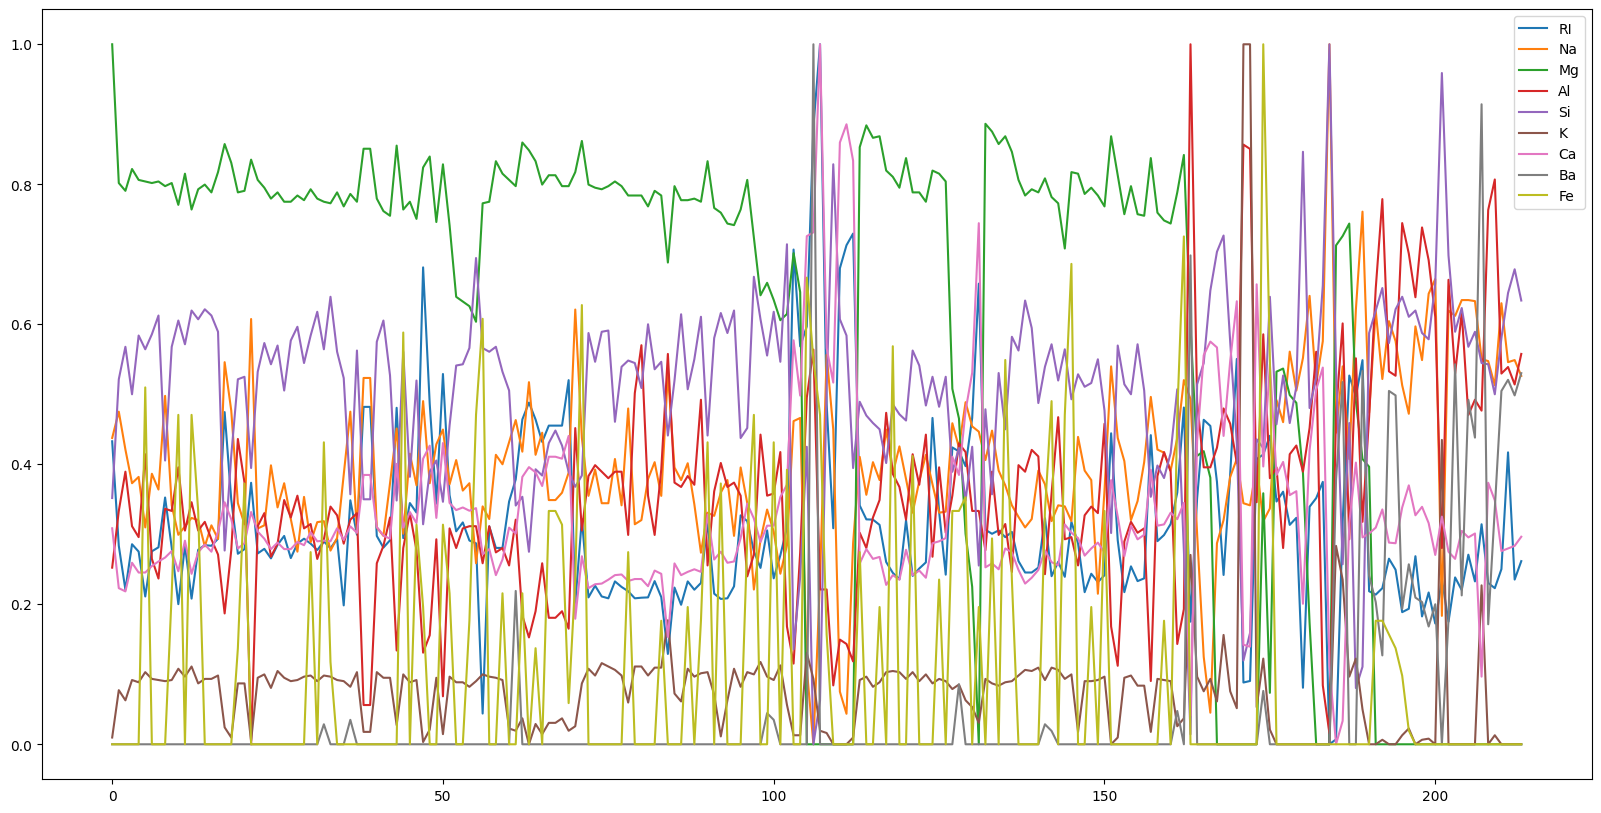

In [7]:
# Vērtību vizualizācijai tiek atlasīti tikai atribūti ar skaitliskām vērtībām nepārtrauktajā skalā
darba_datu_kopa_vizualizacijai = darba_datu_kopa[
    ["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"]
]
# Vērtību attēlojuma izvade
darba_datu_kopa_vizualizacijai.plot(figsize=(20, 10))

Vērtību attēlojums ļauj veikt šādus secinājumus:

-


### Histogrammu analīze


array([[<Axes: title={'center': 'RI'}>, <Axes: title={'center': 'Na'}>,
        <Axes: title={'center': 'Mg'}>],
       [<Axes: title={'center': 'Al'}>, <Axes: title={'center': 'Si'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'Ca'}>, <Axes: title={'center': 'Ba'}>,
        <Axes: title={'center': 'Fe'}>],
       [<Axes: title={'center': 'type_code'}>, <Axes: >, <Axes: >]],
      dtype=object)

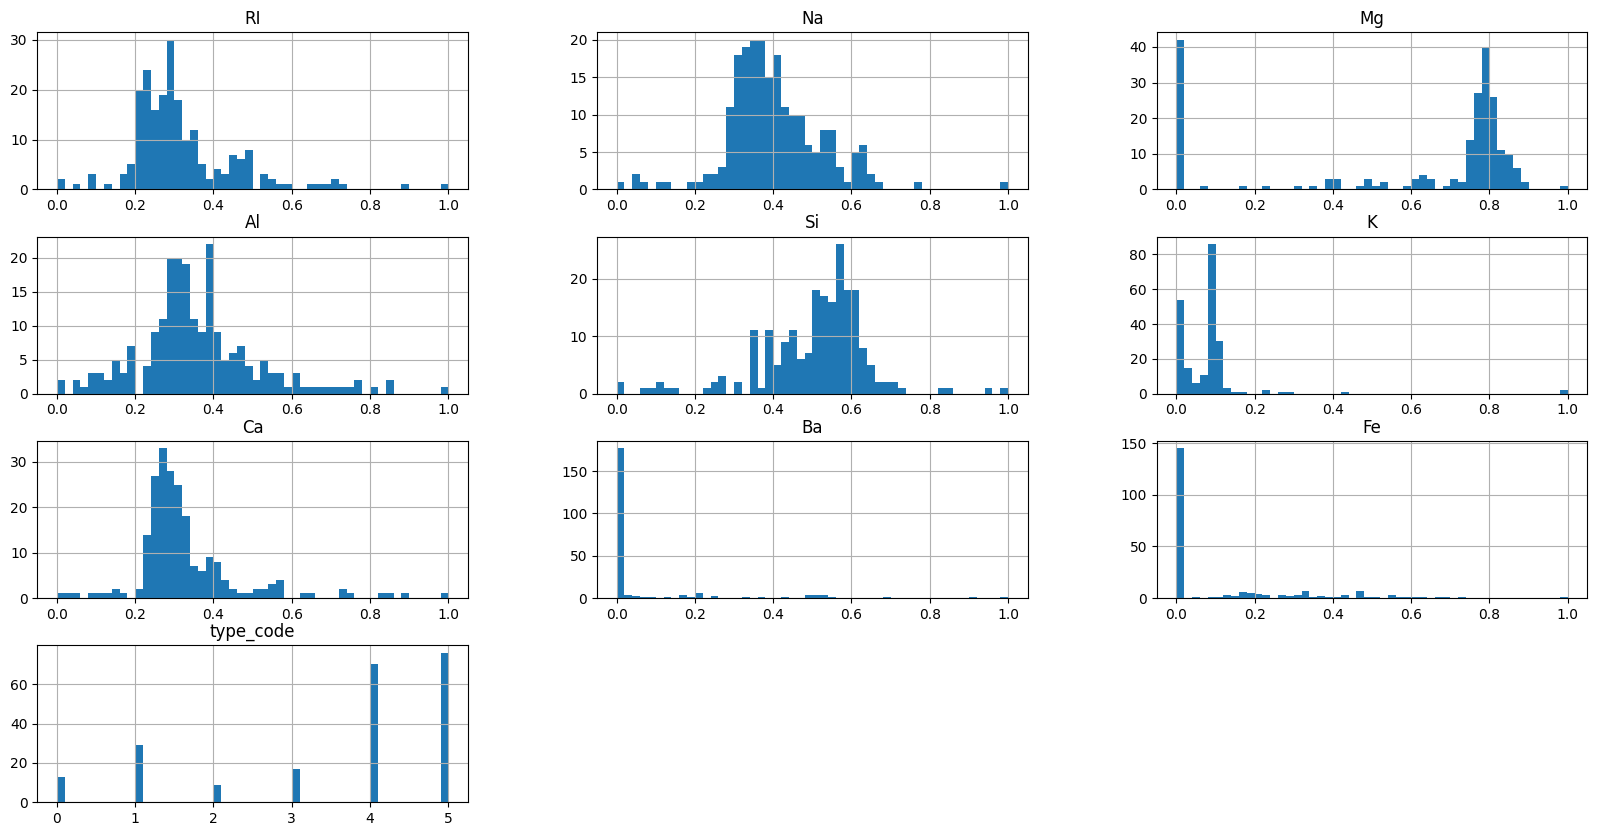

In [8]:
# Datu kopas atribūtu histogrammu izvade
darba_datu_kopa.hist(figsize=(20, 10), bins=50)

Histogrammās redzam, ka divi tipi ir vairak pārstāvēti. Tas nozīmē, ka datu kopā pieejamās klases nav sabalansētas.


### Izkliedes diagrammu analīze (Atribūtu savstarpējie sadalījumi)


Text(0.5, 0.98, 'Faktoru savstarpējās attiecības')

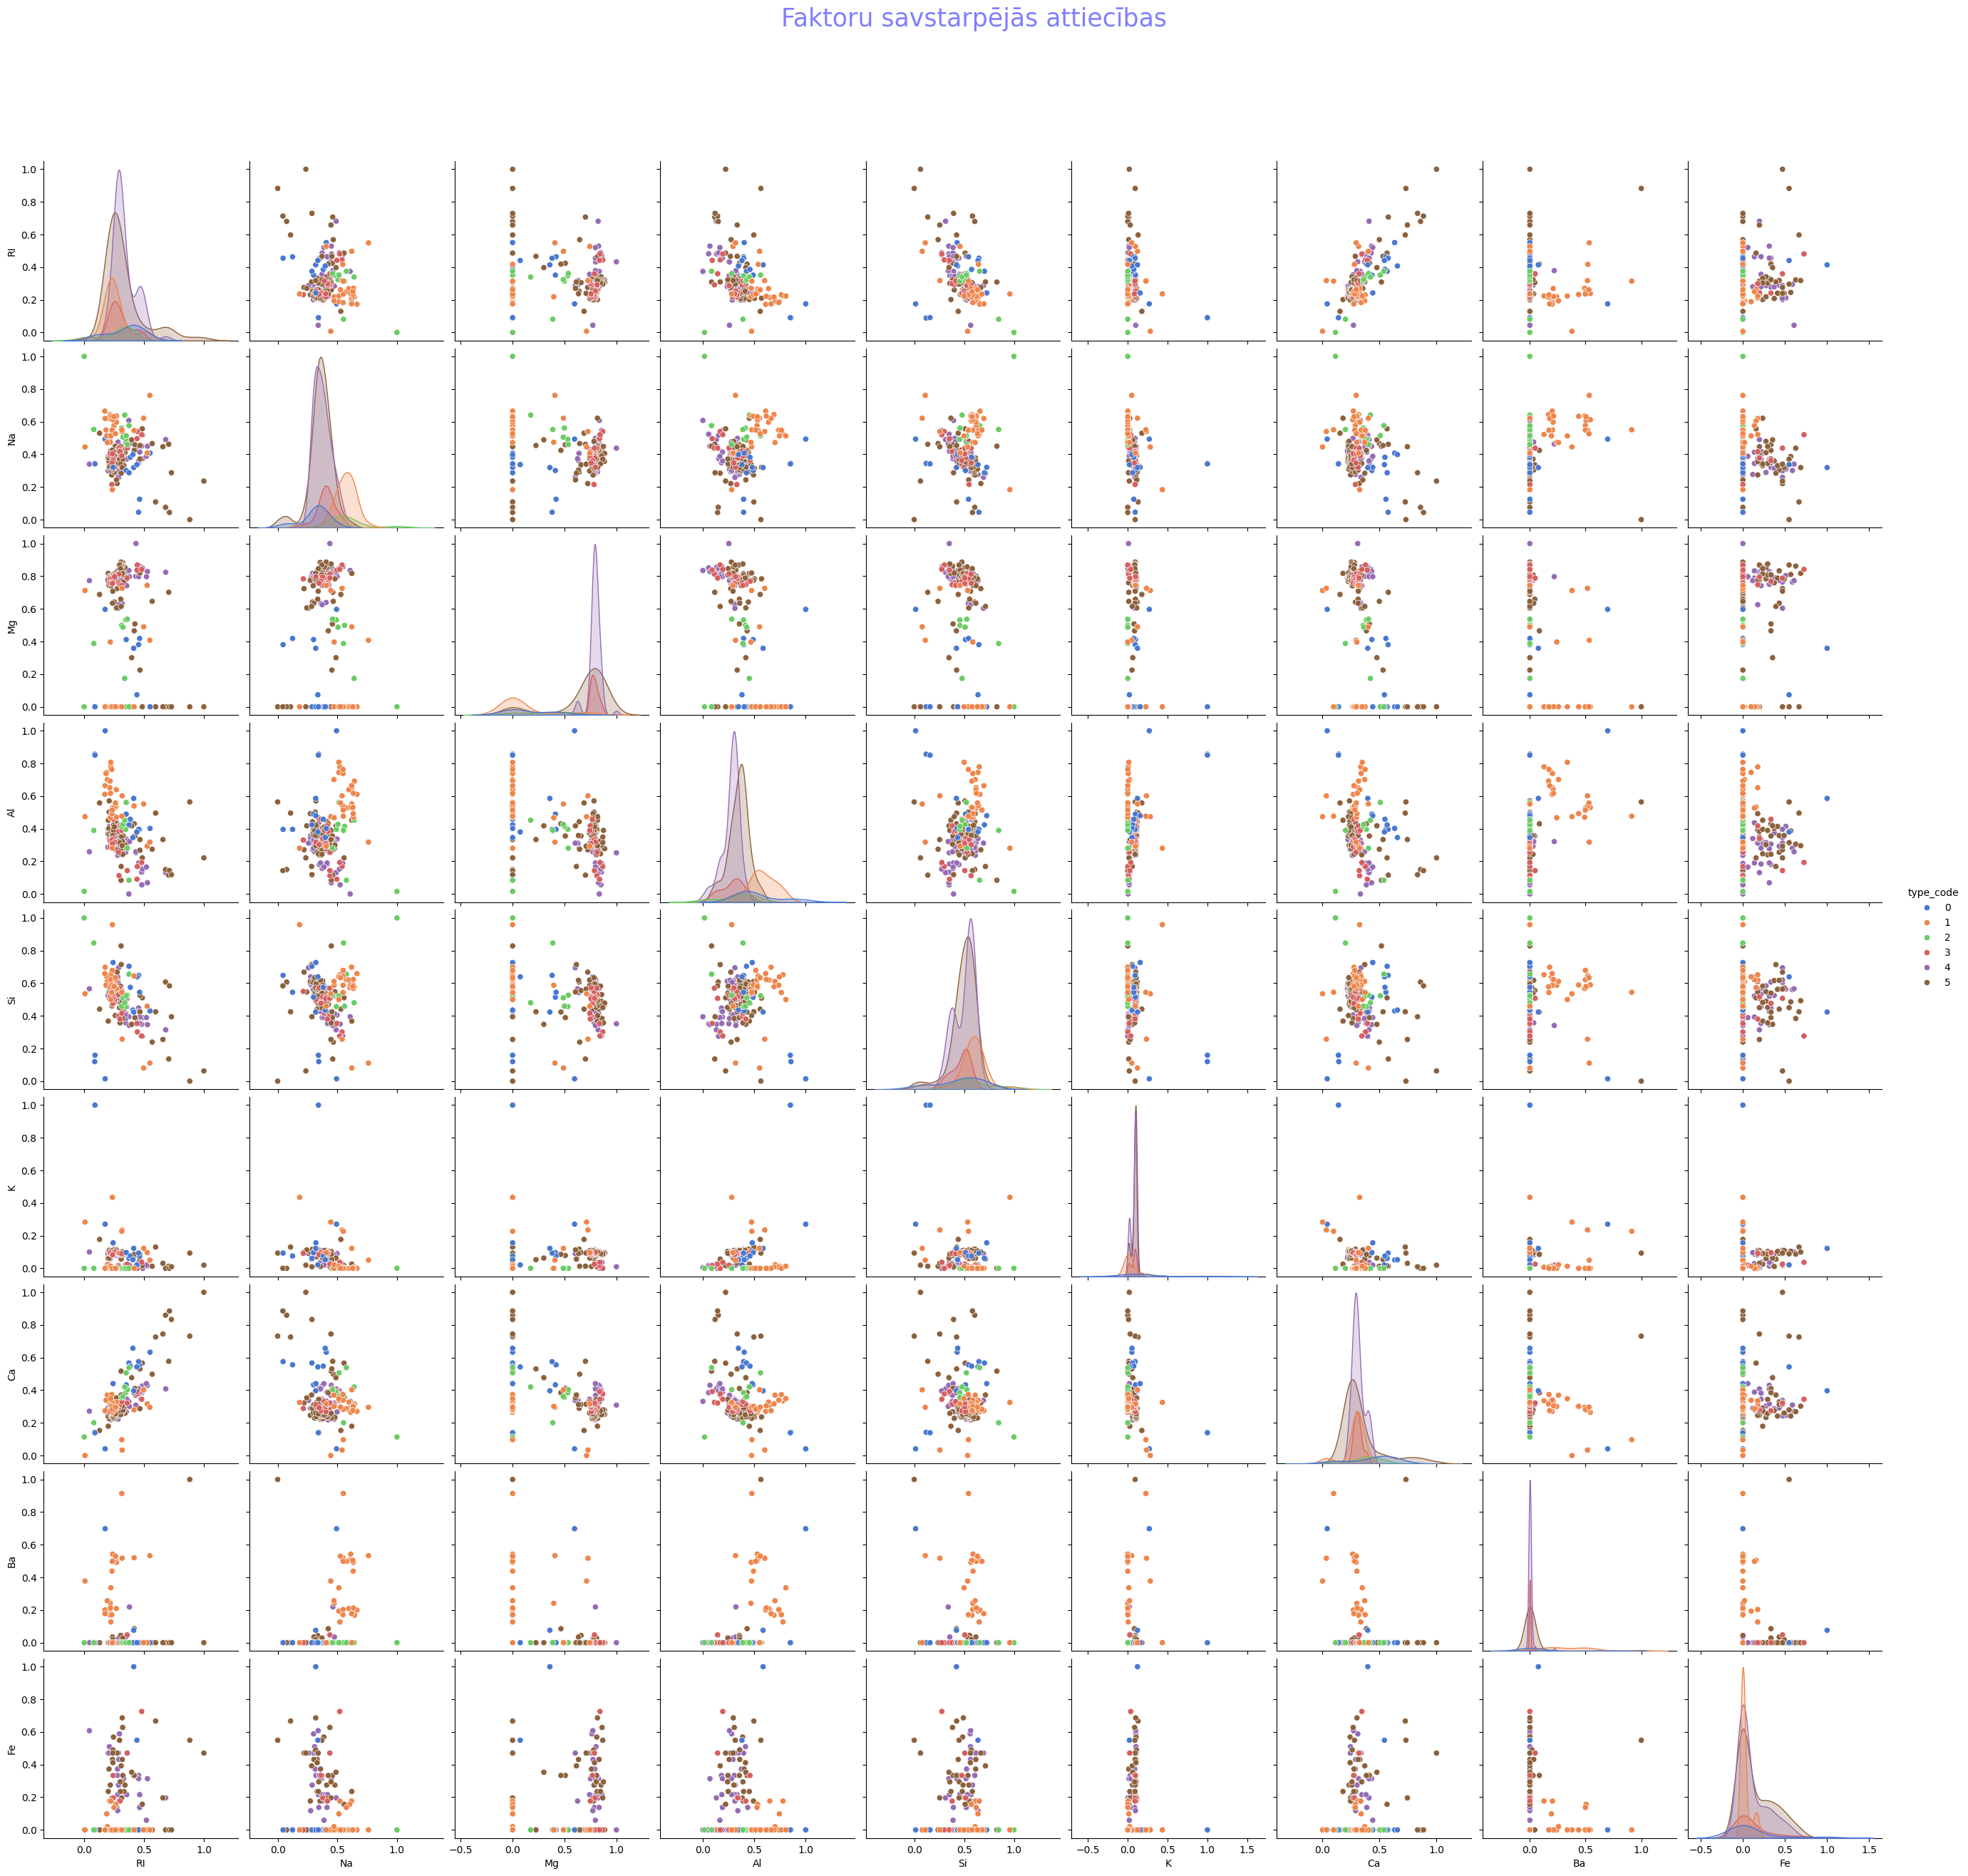

In [9]:
# Izveidojam atribūtu pāru grafiku, norādot tā kopējo izmēru  un krāsu shēmu
# paru_grafiks = sns.pairplot(darba_datu_kopa,hue='species_cat',palette="muted",height=3,vars=['culmen_length_mm','culmen_depth_mm','flipper_length_mm', 'body_mass_g'],kind='scatter')
# # Papildus atstarpe, lai virsraksts tiktu attēlots pareizi
# plt.subplots_adjust(top=0.9)
# #Norādām virsrakstu grafikam
# paru_grafiks.fig.suptitle('Faktoru savstarpējās attiecības',fontsize=25,color='b',alpha=0.5)

paru_grafiks = sns.pairplot(
    darba_datu_kopa,
    hue="type_code",
    palette="muted",
    height=3,
    vars=["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"],
    kind="scatter",
)
plt.subplots_adjust(top=0.9)
paru_grafiks.figure.suptitle(
    "Faktoru savstarpējās attiecības", fontsize=25, color="b", alpha=0.5
)

Faktoru sadalījumi tiek pētīti, par pamatu izmantojot tipus. Grafiki ļauj secināt, ka faktori nav vienmērīgi sadalīti, kas nozīmē, ka daži faktori var būt labāki kā citi klasifikācijas uzdevumā.

Savukārt šādi atribūtu pāri nenodrošina labu klašu atdalamību:

-


### Atribūtu savstarpējā korelācija


<Axes: >

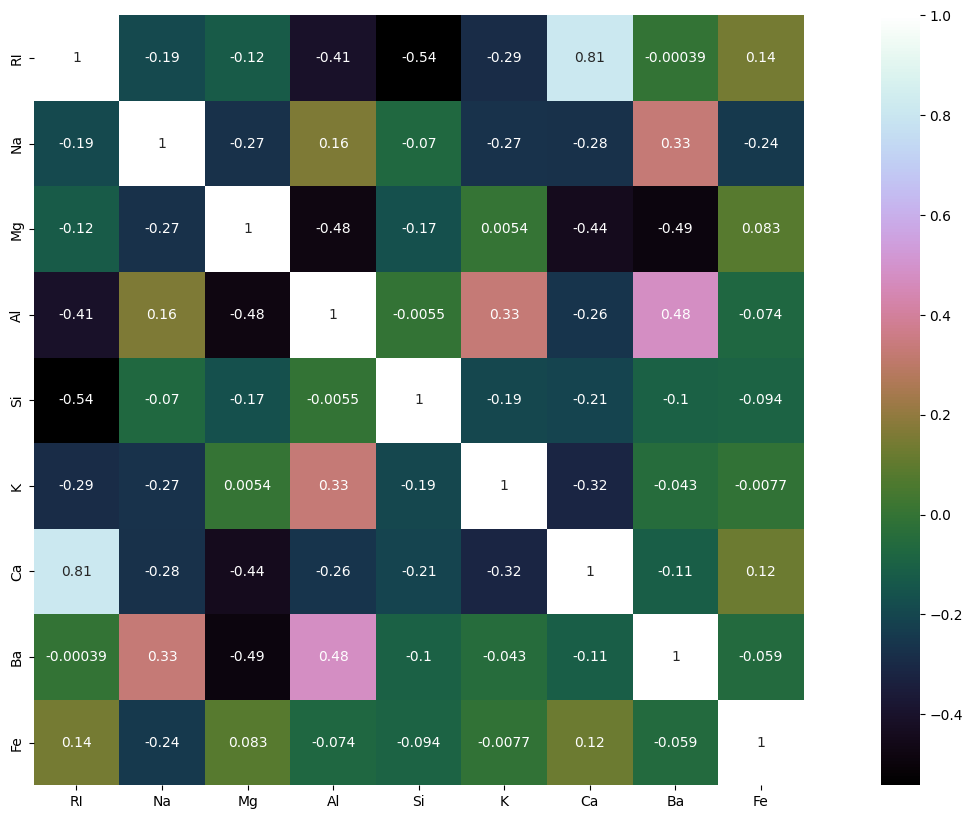

In [10]:
# Tiek izveidota korelācijas matrica, tajā atspoguļojot korelācijas koeficientu skaitliskiem atribūtiem
korelacijas_matrica = darba_datu_kopa_vizualizacijai.corr(method="pearson")
plt.figure(figsize=(20, 10))
sns.heatmap(korelacijas_matrica, vmax=1, square=True, annot=True, cmap="cubehelix")

Korelācijas matricas analīze ļauj secināt, ka:

- tikai Ca un Re faktori ir stipri korelēti


## K-vidējo algoritms


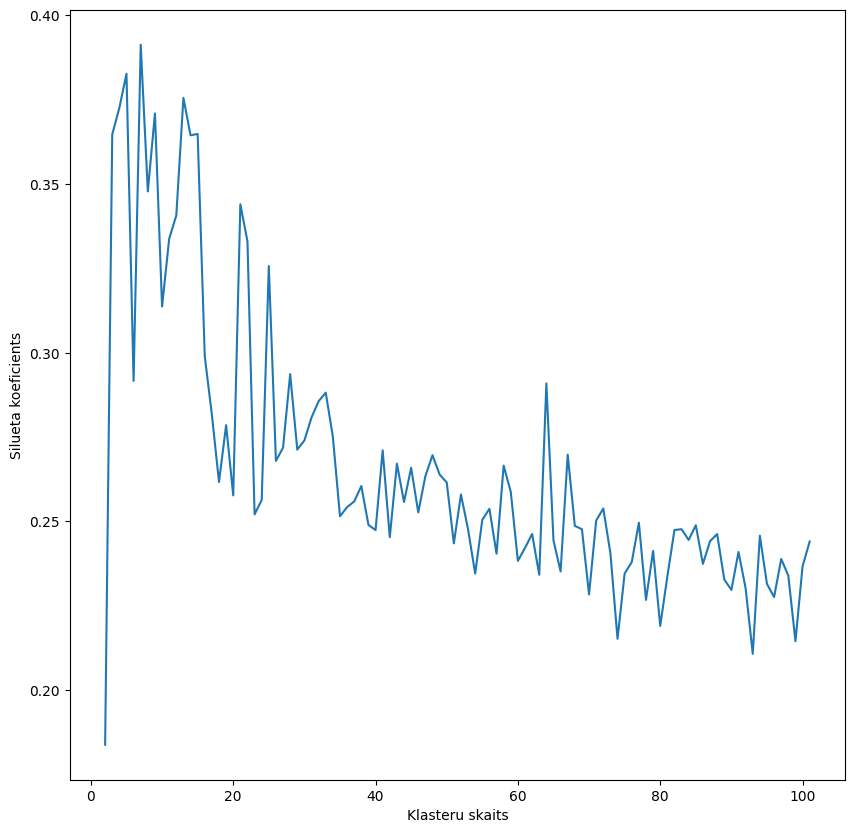

In [11]:
# algoritma izmantošanai nepieciešamo bibliotēku ielāde
from sklearn.cluster import KMeans
from sklearn import metrics

# tiek atlasīta datu kopa klasterizācijas uzdevumam, ietverot tajā 8 atribūtus no normalizētas datu kopas
darba_datu_kopa_klasterizacijai_8_pazimes = darba_datu_kopa[
    ["Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"]
]
# Silueta koeficienta vērtību saraksta izveide
Silueta_koeficients = []
# tiek realizēts cikls ar 100 iterācijām ( 100 dažādām klasteru skaita vērtībām)
# šajā gadījumā 1 klasteris netiek apskatīts, jo tam nav jēgas silueta koeficienta aprēķinā
for i in range(2, 102):
    # Kmeans klasterizācijas modeļa izveide, kur veidojamo klasteru skaits (n_clusters) ir vienāds ar cikla iterācijas numuru (2, 3..)
    kmeans_modelis = KMeans(n_clusters=i, init="k-means++")
    # Kmeans modeļa apmācība, izmantojot atlasīto datu kopu ar trim atribūtiem
    kmeans_modelis.fit(darba_datu_kopa_klasterizacijai_8_pazimes)
    # Silueta koeficients tiek aprēķināts, ņemot par pamatu iepriekš atlasīto datu kopu ar trim atribūtiem no normalizētas datu kopas
    Silueta_koeficients.append(
        metrics.silhouette_score(
            darba_datu_kopa_klasterizacijai_8_pazimes, kmeans_modelis.labels_
        )
    )
# iegūto rezultātu vizuālā attēlošana
plt.figure(figsize=(10, 10))
plt.plot(range(2, 102), Silueta_koeficients)
plt.xlabel("Klasteru skaits")
plt.ylabel("Silueta koeficients")
plt.show()

[[0.47362406 0.05064588 0.49227414 0.52675    0.08016103 0.42109665
  0.20907937 0.09411765]
 [0.3810563  0.76473464 0.31939062 0.50138284 0.08000471 0.29933584
  0.00876887 0.11716882]]


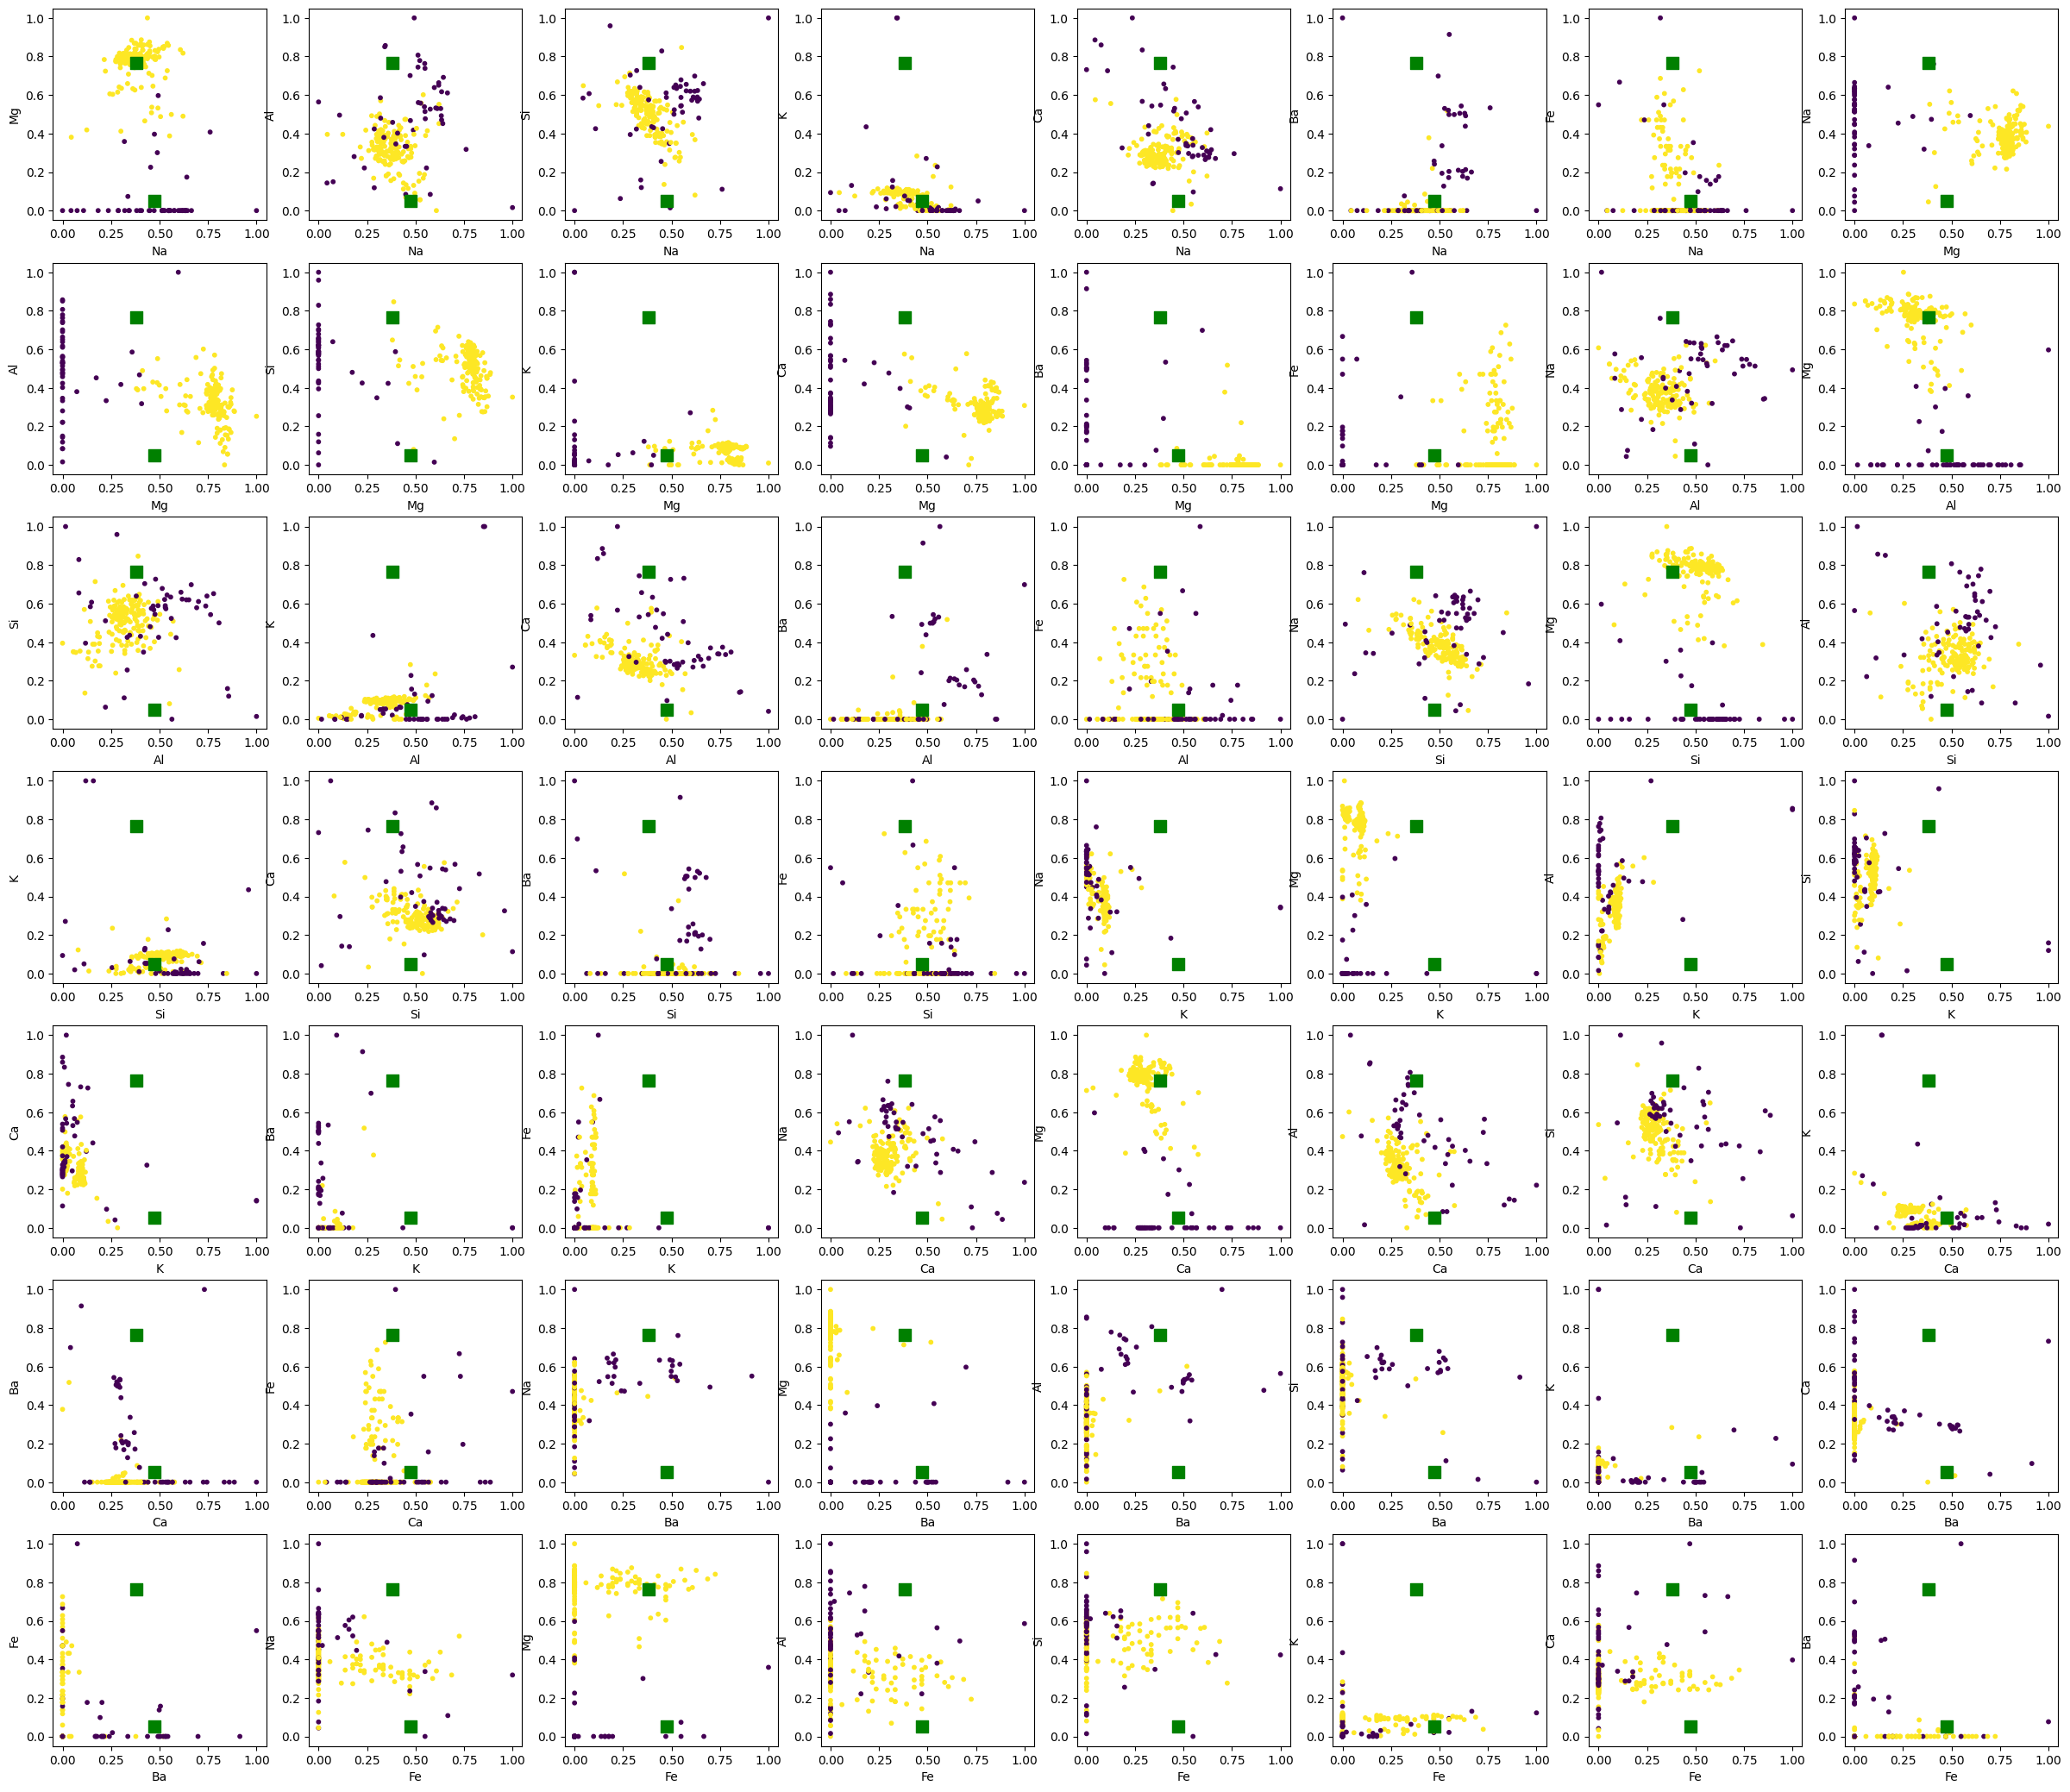

In [12]:
# lai izvadītu kalsterizācijas rezultātus, tiek pievienota papildu bibliotēka
import matplotlib.pyplot as plt

# tiek izveidots un apmācīts K-vidējo algoritma nodelis ar 2 klasteriem, izmantojot iepriekš izveidoto datu apakškopu ar 8 atribūtiem
kmeans_modelis = KMeans(n_clusters=2, init="k-means++").fit(
    darba_datu_kopa_klasterizacijai_8_pazimes
)
# tiek iegūti klasteru centri
centroids = kmeans_modelis.cluster_centers_
# izveidojam prognozes datu objektu piederībai klasteriem
ypred = kmeans_modelis.predict(darba_datu_kopa_klasterizacijai_8_pazimes)
# atspoguļojam klasterizācijas rezultātus izkliedes diagrammās

print(centroids)

index = 0

plt.figure(figsize=(30, 30))

for first in ["Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"]:
    for second in ["Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"]:
        if first != second:
            plt.subplot(8, 8, index + 1)
            index += 1
            plt.scatter(
                darba_datu_kopa_klasterizacijai_8_pazimes[first],
                darba_datu_kopa_klasterizacijai_8_pazimes[second],
                s=10,
                c=ypred,
            )
            plt.scatter(centroids[..., 0], centroids[..., 1], s=100, c="g", marker="s")
            plt.xlabel(first)
            plt.ylabel(second)

plt.show()

# plt.subplot(
#     2, 2, 1
# )  # Izveido attēlu matricā (2 x 2), indekss sākas ar 1 kreisajā augšējā stūrī
# plt.scatter(
#     darba_datu_kopa_klasterizacijai_8_pazimes["culmen_length_mm"],
#     darba_datu_kopa_klasterizacijai_8_pazimes["culmen_depth_mm"],
#     s=10,
#     c=ypred,
# )
# plt.scatter(centroids[0, 0], centroids[0, 1], s=100, c="g", marker="s")
# plt.scatter(centroids[1, 0], centroids[1, 1], s=100, c="g", marker="s")
# plt.subplot(2, 2, 2)  # Izveido nākošo attēlu matricā ar indeksu 2
# plt.scatter(
#     darba_datu_kopa_klasterizacijai_8_pazimes["culmen_length_mm"],
#     darba_datu_kopa_klasterizacijai_8_pazimes["flipper_length_mm"],
#     s=10,
#     c=ypred,
# )
# plt.scatter(centroids[0, 0], centroids[0, 1], s=100, c="g", marker="s")
# plt.scatter(centroids[1, 0], centroids[1, 1], s=100, c="g", marker="s")
# plt.subplot(2, 2, 3)  # Izveido nākošo attēlu matricā ar indeksu 2
# plt.scatter(
#     darba_datu_kopa_klasterizacijai_8_pazimes["culmen_depth_mm"],
#     darba_datu_kopa_klasterizacijai_8_pazimes["flipper_length_mm"],
#     s=10,
#     c=ypred,
# )


# plt.scatter(centroids[0, 0], centroids[0, 1], s=100, c="g", marker="s")
# plt.scatter(centroids[1, 0], centroids[1, 1], s=100, c="g", marker="s")
# plt.show()

## Hierarhiskā aglomeratīvā klasterēšana


In [13]:
# algoritma izmantošanai nepieciešamās bibliotēkas ielāde
from sklearn.cluster import AgglomerativeClustering

# algoritma modeļa izveide, par pamatu izmantojot datu apakškopu ar 8 atribūtiem
clustering = AgglomerativeClustering().fit(darba_datu_kopa_klasterizacijai_8_pazimes)

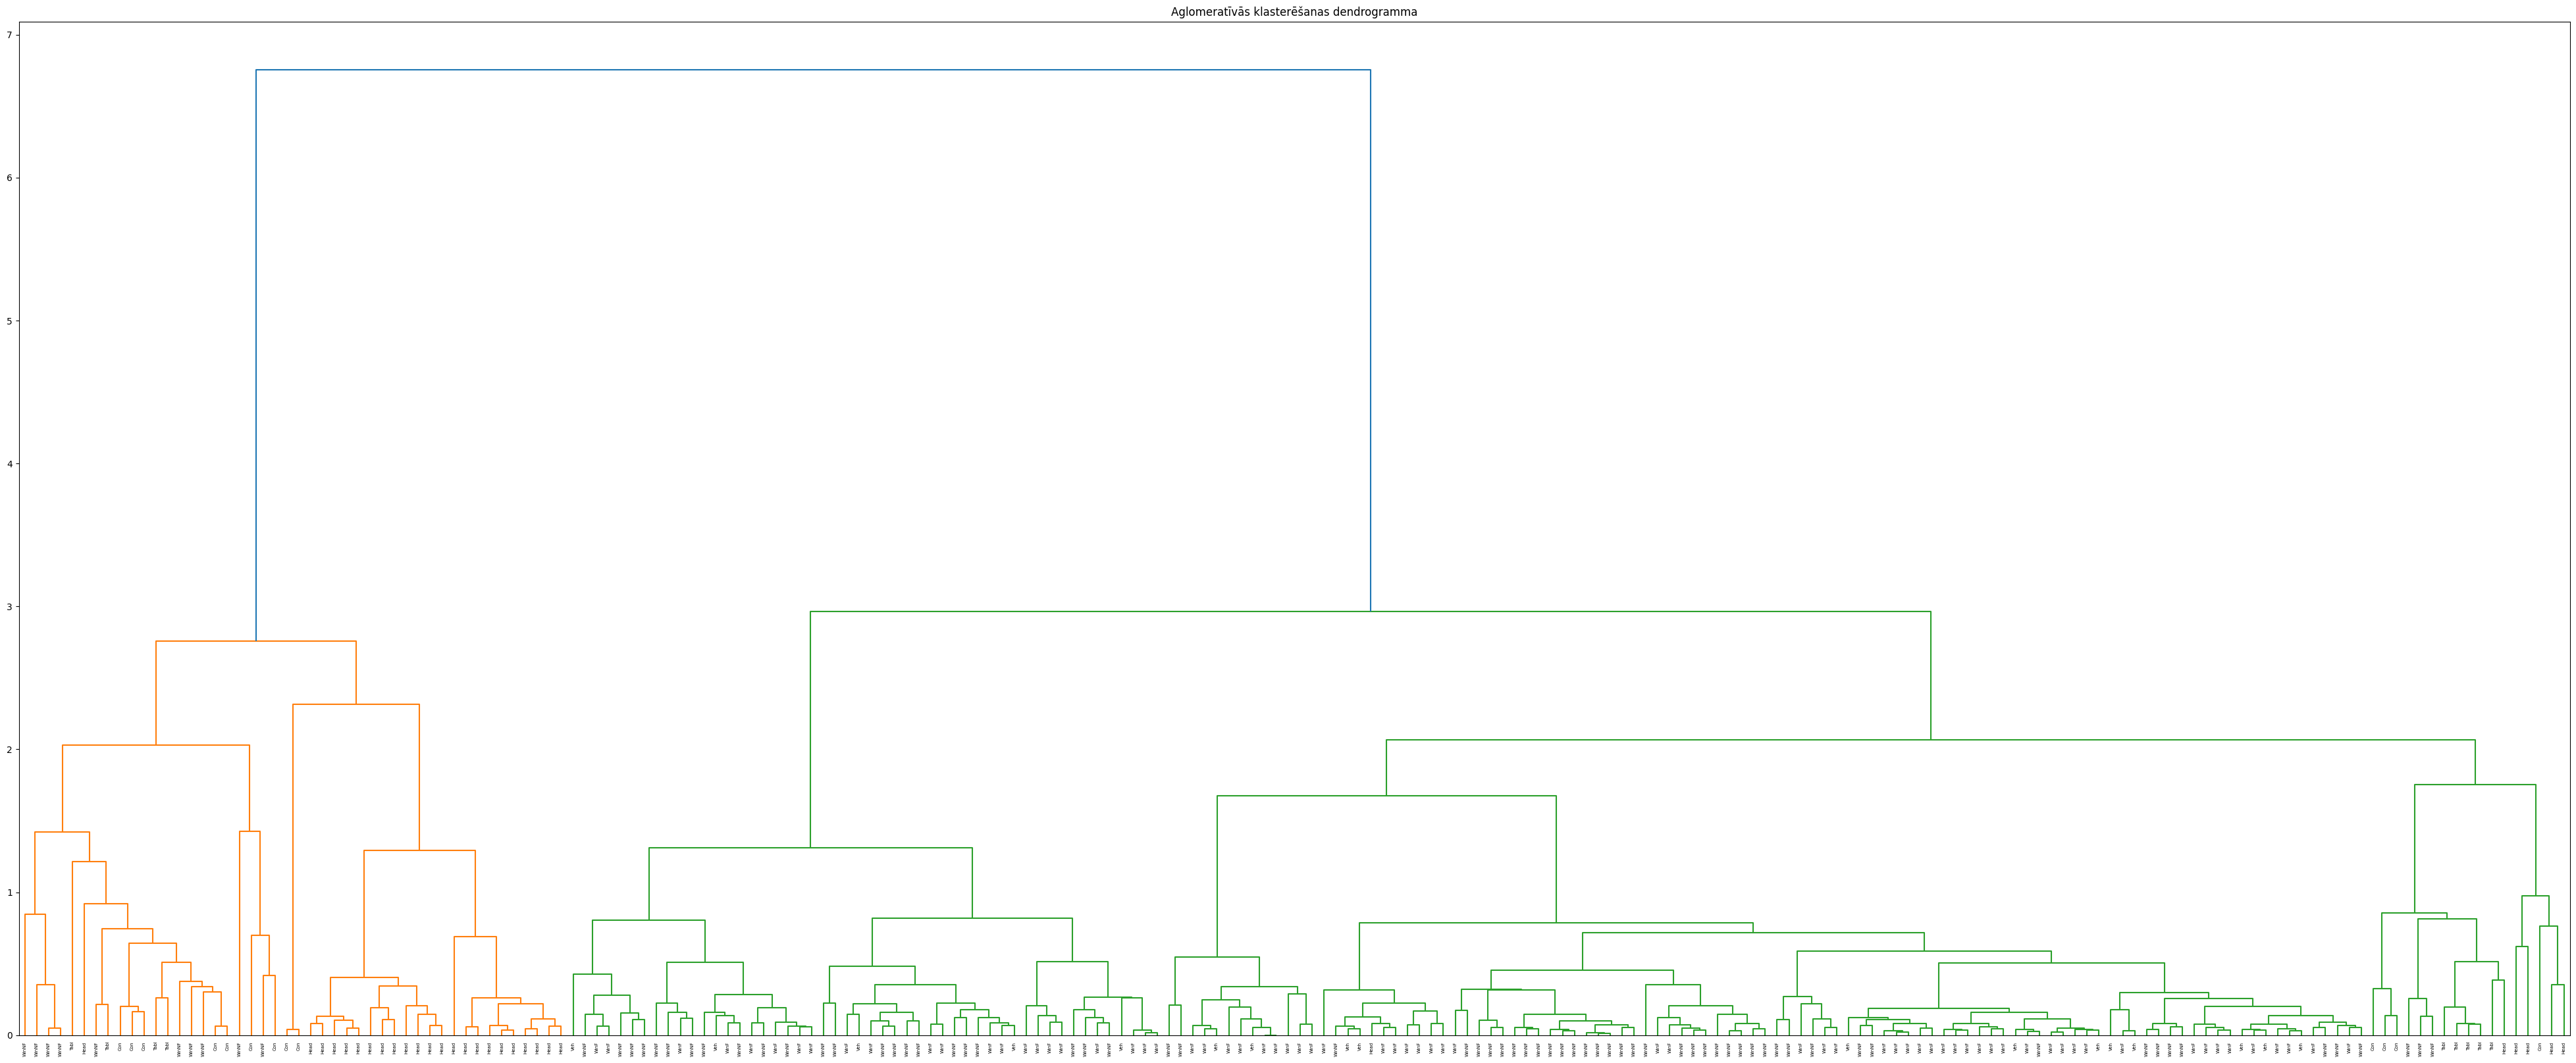

In [14]:
# dendrogrammas atspoguļošanai nepieciešamās bibliotēkas ielāde
import scipy.cluster.hierarchy as shc

# dendrogrammas izvade, par pamatu izmantojot saistīšanas metodi "ward"
plt.figure(figsize=(50, 20))
plt.title("Aglomeratīvās klasterēšanas dendrogramma")
Dendrogram = shc.dendrogram(
    (shc.linkage(darba_datu_kopa_klasterizacijai_8_pazimes, method="ward")),
    labels=datu_kopa["type"].values,
)

## Mākslīgo neironu tīkli


In [15]:
# bibliotēkas ielāde datu sadalīšanai apmācības un testa datu kopās
from sklearn.model_selection import train_test_split

# atsevišķajā mainīgajā saglabājam datu objektu izeju vērtības, t.i. klasteru numurus
izejas = darba_datu_kopa["type_code"]
# uzdodam datu objektu proporciju, kuri veidos apmācības datu kopu (80%) TODO: parbaudīt
apmacibas_datu_proporcija = 0.85
# tiek veikta datu kopas sadalīšana testa un apmācības kopā, izmantojot nejaušu sadalījumu ar attecību 85% un 15%
X_apmacibas, X_testa, y_apmacibas, y_testa = train_test_split(
    darba_datu_kopa_klasterizacijai_8_pazimes,
    izejas,
    test_size=1.0 - apmacibas_datu_proporcija,
    random_state=42,
)

#### Modelis


              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.86      1.00      0.92         6
           2       1.00      0.67      0.80         3
           3       0.00      0.00      0.00         2
           4       0.78      0.78      0.78         9
           5       0.69      0.90      0.78        10

    accuracy                           0.79        33
   macro avg       0.72      0.67      0.68        33
weighted avg       0.76      0.79      0.76        33



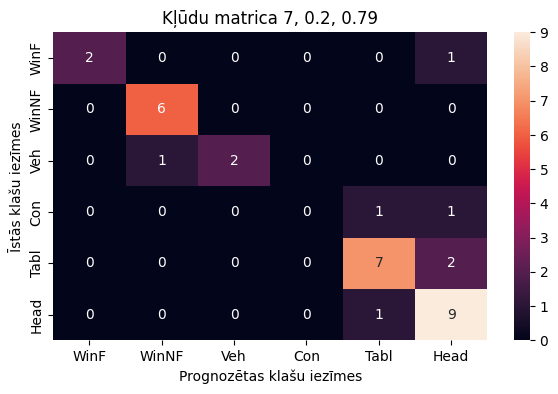

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       1.00      1.00      1.00         6
           2       1.00      0.67      0.80         3
           3       0.00      0.00      0.00         2
           4       0.80      0.89      0.84         9
           5       0.67      0.80      0.73        10

    accuracy                           0.79        33
   macro avg       0.69      0.67      0.67        33
weighted avg       0.75      0.79      0.77        33



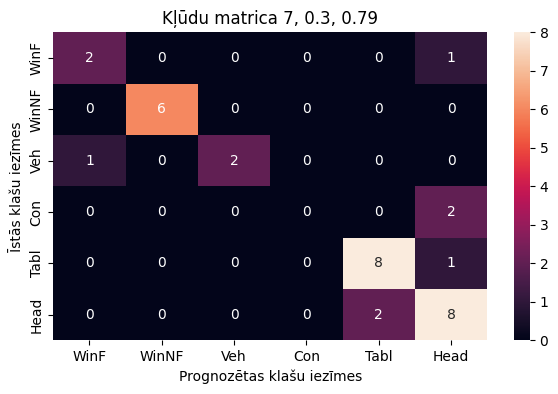

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.86      1.00      0.92         6
           2       1.00      0.67      0.80         3
           3       0.00      0.00      0.00         2
           4       0.50      1.00      0.67         9
           5       0.75      0.30      0.43        10

    accuracy                           0.67        33
   macro avg       0.68      0.61      0.60        33
weighted avg       0.70      0.67      0.62        33



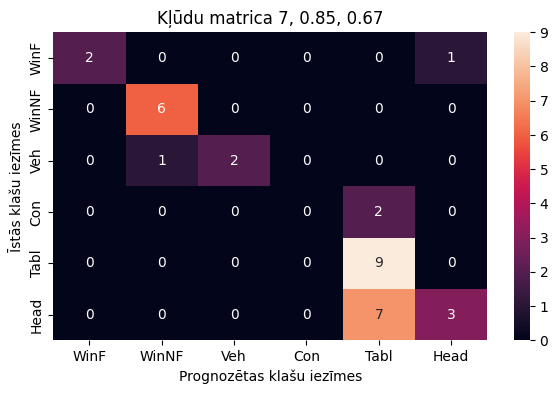

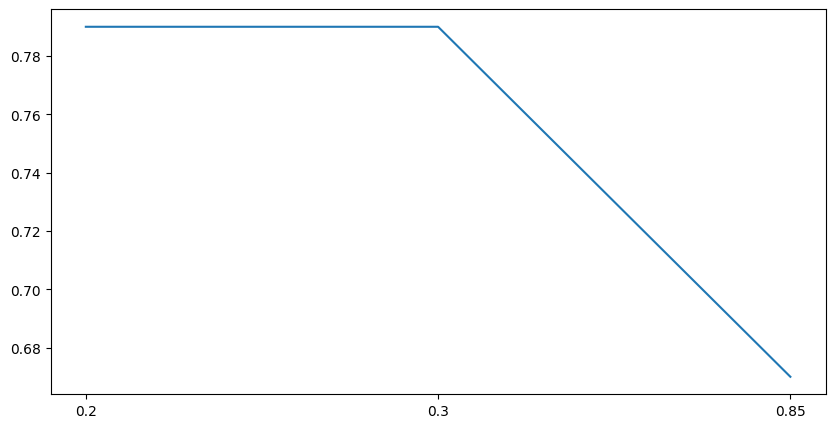

In [16]:
# algoritma izmantošanai nepieciešamās bibliotēkas ielāde
# bibliotēku pievienošana algoritma veikuma novērtēšanai un izvadei


from sklearn.neural_network import MLPClassifier


from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
import pylab as pltb

# 1-
learning_rate = [0.2, 0.3, 0.85]
layer = 7  # [(5),(6),(7),(8)]


# izveidojam mākslīgo neironu tīkla modeli ar 5 neironiem vienā slēptajā slānī
# Tiek uzdoti šādi parametri: maksimālais apmācības iterāciju skaits ir 5000, aktivizācijas funkcija ir loģistiskā,
# svaru piemeklēšanas metode ir stohastiskais gradienta krītums, mācīšanās ātrums 0.2 un bez apmācības iterāciju izvades
accuracies = []
values = []


# for layer in layers: for layer testing
for rate in learning_rate:
    neironu_tikla_modelis_1_slanis = MLPClassifier(
        hidden_layer_sizes=layer,
        max_iter=5000,
        activation="logistic",
        solver="sgd",
        learning_rate_init=rate,
        verbose=0,
    )
    neironu_tikla_modelis_1_slanis.fit(X_apmacibas, y_apmacibas)
    y_prognoze_1_slanis = neironu_tikla_modelis_1_slanis.predict(X_testa)
    report = classification_report(y_testa, y_prognoze_1_slanis, zero_division=0)
    print(report)
    kludu_matrica = confusion_matrix(y_testa, y_prognoze_1_slanis)
    fig, ax = pltb.subplots(figsize=(7, 4))
    sns.heatmap(kludu_matrica, annot=True, fmt="g", ax=ax)
    ax.set_xlabel("Prognozētas klašu iezīmes")
    ax.set_ylabel("Īstās klašu iezīmes")
    report = report.split("\n")
    test_length = report[-2].split(" ")[-1]
    accuracy = (
        report[-4].replace("accuracy", "").replace(test_length, "").replace(" ", "")
    )
    accuracies.append(float(accuracy))
    values.append(rate)
    ax.set_title(
        "Kļūdu matrica " + str(layer) + ", " + str(rate) + ", " + str(accuracy)
    )
    ax.xaxis.set_ticklabels(datu_kopa["type"].unique())
    ax.yaxis.set_ticklabels(datu_kopa["type"].unique())

    plt.show()
plt.figure(figsize=(10, 5))
plt.plot(accuracies)
plt.xticks(range(len(values)), values)
plt.show()
# izveidotajam modelim tiek padotas apmācības datu kopas pazīmju vērtības un īstās izejas

Kļūdu matricā var redzēt, ka tikai 4 datu objekti tika klasificēti nepareizi, līdz ar to kopējā tīkla precizitāte ir diezgan augsta - 96%.
Tādējādi šis modelis ir labāks par iepriekšējo


## kNN algoritms


              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       1.00      0.83      0.91         6
           2       0.67      0.67      0.67         3
           3       1.00      0.50      0.67         2
           4       0.70      0.78      0.74         9
           5       0.64      0.70      0.67        10

    accuracy                           0.73        33
   macro avg       0.78      0.69      0.72        33
weighted avg       0.75      0.73      0.73        33

              precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           1       1.00      0.83      0.91         6
           2       0.67      0.67      0.67         3
           3       0.00      0.00      0.00         2
           4       0.70      0.78      0.74         9
           5       0.58      0.70      0.64        10

    accuracy                           0.67        33
   macro avg       0.55

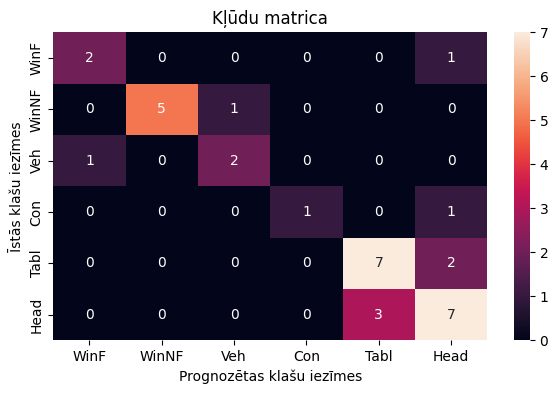

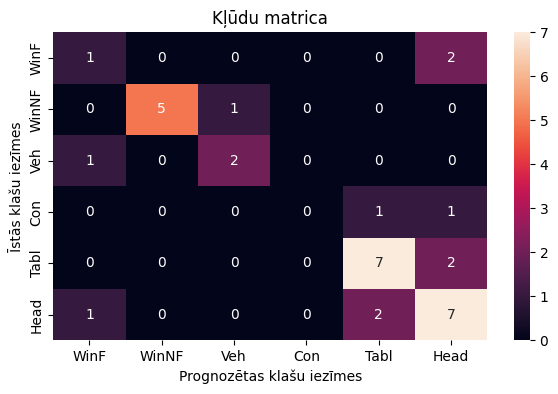

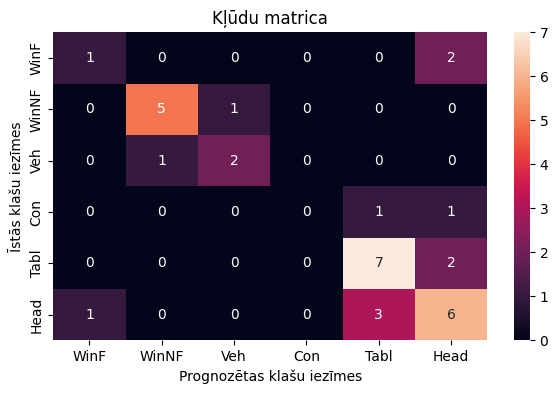

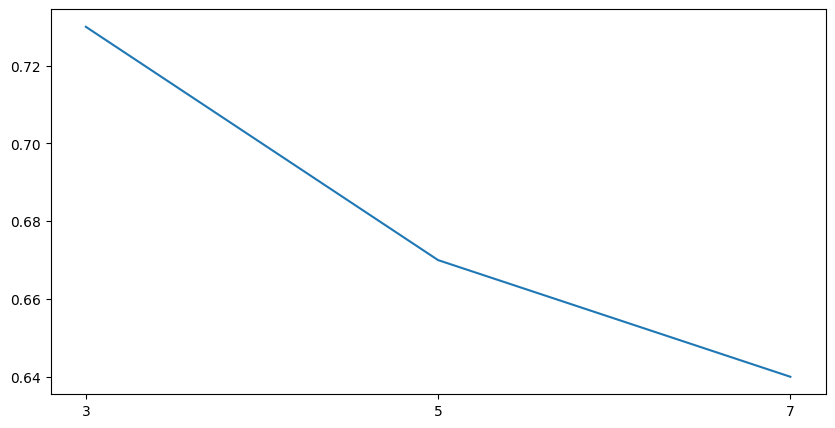

In [21]:
# algoritma izmantošanai nepieciešamās bibliotēkas ielāde
from sklearn.neighbors import KNeighborsClassifier

# Tiek izveidots algoritma modelis ar 5 kaimiņiem

neighbours = [3, 5, 7]
accuracies = []

for neighbour in neighbours:
    KNN_MODEL = KNeighborsClassifier(n_neighbors=neighbour)
    # Padodam izveidotajam modelim apmācības datu kopu
    KNN_MODEL.fit(X_apmacibas, y_apmacibas)
    # Nosakam klases iezīmes testa datu kopas datu objektiem
    y_prognoze_knn = KNN_MODEL.predict(X_testa)
    # izvadām modeļa veikuma novērtējuma metrikas
    report = classification_report(y_testa, y_prognoze_knn, zero_division=0)
    print(report)
    report = report.split("\n")
    test_length = report[-2].split(" ")[-1]
    accuracy = (
        report[-4].replace("accuracy", "").replace(test_length, "").replace(" ", "")
    )
    accuracies.append(float(accuracy))

    # veidojam kļūdu matricu
    kludu_matrica = confusion_matrix(y_testa, y_prognoze_knn)
    # izvadām kļūdu matricu
    fig, ax = pltb.subplots(figsize=(7, 4))
    sns.heatmap(kludu_matrica, annot=True, fmt="g", ax=ax)
    ax.set_xlabel("Prognozētas klašu iezīmes")
    ax.set_ylabel("Īstās klašu iezīmes")
    ax.set_title("Kļūdu matrica")
    ax.xaxis.set_ticklabels(datu_kopa["type"].unique())
    ax.yaxis.set_ticklabels(datu_kopa["type"].unique())

plt.figure(figsize=(10, 5))
plt.plot(accuracies)
plt.xticks(range(len(neighbours)), neighbours)
plt.show()

Kļūdu matricā var redzēt, ka tikai 3 datu objekti tika klasificēti nepareizi, līdz ar to kopējā algoritma precizitāte ir diezgan augsta - 97%.Tā ir pat nedaudz augstākā nekā neironu tīkla modelim


## SVM algoritms

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       1.00      0.17      0.29         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         9
           5       0.31      1.00      0.48        10

    accuracy                           0.33        33
   macro avg       0.22      0.19      0.13        33
weighted avg       0.28      0.33      0.20        33



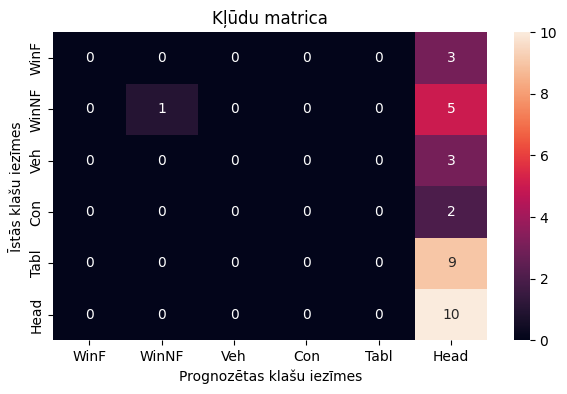

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.71      0.83      0.77         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         2
           4       0.86      0.67      0.75         9
           5       0.47      0.90      0.62        10

    accuracy                           0.61        33
   macro avg       0.34      0.40      0.36        33
weighted avg       0.51      0.61      0.53        33



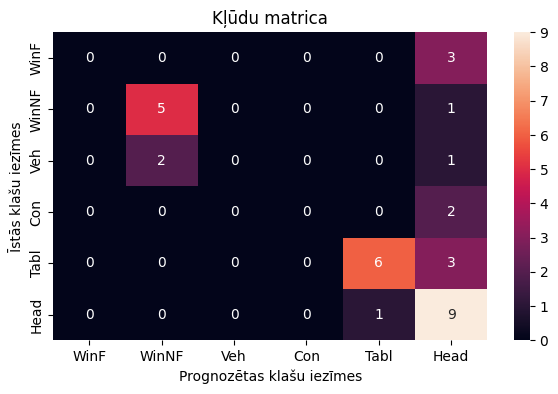

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.86      1.00      0.92         6
           2       1.00      0.67      0.80         3
           3       0.00      0.00      0.00         2
           4       0.67      0.67      0.67         9
           5       0.54      0.70      0.61        10

    accuracy                           0.70        33
   macro avg       0.68      0.62      0.63        33
weighted avg       0.68      0.70      0.68        33



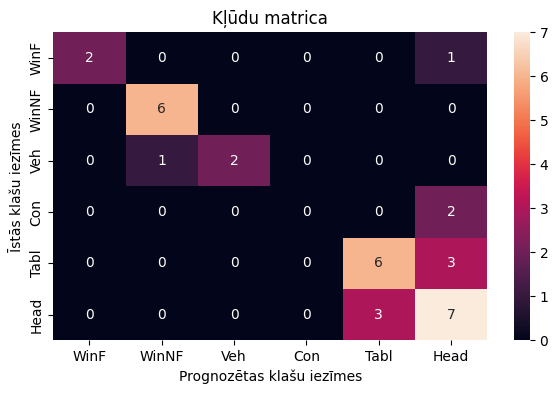

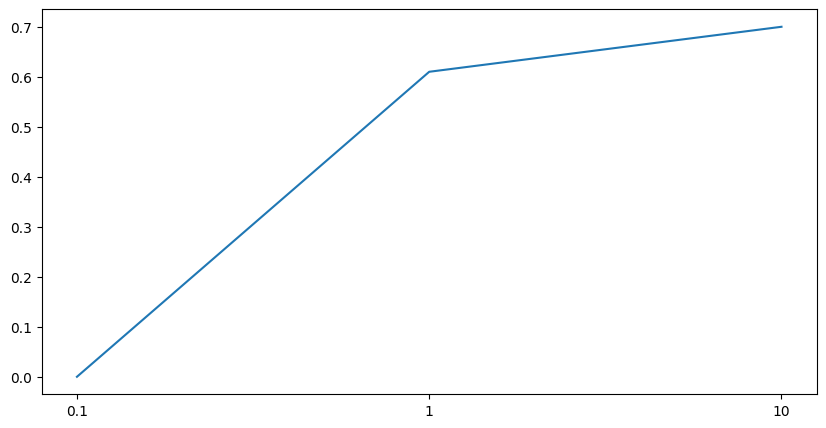

In [18]:
from sklearn import svm
from sklearn.metrics import classification_report


# izveidojam modeli
cs=[0.1, 1, 10]
# gammas = [0.1, 0.5, 1, 5, 10, 50, 100]
accuracies = []
for c in cs:
    SVM_MODEL = svm.SVC(kernel='linear', C=c)
    # apmācam modeli    
    SVM_MODEL.fit(X_apmacibas, y_apmacibas)
    # prognozējam testa datu kopu
    y_prognoze_svm = SVM_MODEL.predict(X_testa)
    # izvadām modeļa veikuma novērtējuma metrikas
    report = classification_report(y_testa, y_prognoze_svm, zero_division=0)
    print(report)
    report = report.split("\n")
    test_length = report[-2].split(" ")[-1]
    accuracy = (
        report[-4].replace("accuracy", "").replace(test_length, "").replace(" ", "")
    )
    accuracies.append(float(accuracy))
    
    # veidojam kļūdu matricu
    kludu_matrica = confusion_matrix(y_testa, y_prognoze_svm)
    # izvadām kļūdu matricu
    fig, ax = pltb.subplots(figsize=(7, 4))
    sns.heatmap(kludu_matrica, annot=True, fmt="g", ax=ax)
    ax.set_xlabel("Prognozētas klašu iezīmes")
    ax.set_ylabel("Īstās klašu iezīmes")
    ax.set_title("Kļūdu matrica")
    ax.xaxis.set_ticklabels(datu_kopa["type"].unique())
    ax.yaxis.set_ticklabels(datu_kopa["type"].unique())
    plt.show()

plt.figure(figsize=(10, 5))
plt.plot(accuracies)
plt.xticks(range(len(cs)), cs)
plt.show()

